In [70]:
import numpy as np
from megs.data import image_modules

In [35]:
path = "../../RAW DATA/eigen3d.npy"
eigen3d = np.load(path)
import matplotlib.pyplot as plt

In [18]:
from mayavi import mlab

In [51]:
def mayaviContour(volume, colorbar = False, azimuth = 90, elevation = -50, distance = 180, contour_count = 500, opacity = .01 , save_path = None):
    fig1 = mlab.figure(size=(1000, 1000), bgcolor=(0, 0, 0), fgcolor=(1, 1,1))
    scalars = mlab.pipeline.scalar_field(volume)
    contours = mlab.pipeline.contour_surface(scalars,contours = contour_count,transparent=True, opacity = opacity,colormap = "magma")
    if colorbar: mlab.colorbar(orientation="vertical", nb_labels=3)
    mlab.view(azimuth=azimuth, elevation=elevation, distance=distance)
    if save_path is not None:
        mlab.savefig(save_path,figure = fig1)
    mlab.show()
    
    
def mayaviVolume(volume, colorbar = False, azimuth = 90, elevation = -50, distance = 180, opacity = .01 , save_path = None):
    fig1 = mlab.figure(size=(1000, 1000), bgcolor=(0, 0, 0), fgcolor=(1, 1,1))
    scalars = mlab.pipeline.scalar_field(volume)
    contours = mlab.pipeline.volume(scalars)
    if colorbar: mlab.colorbar(orientation="vertical", nb_labels=3)
    mlab.view(azimuth=azimuth, elevation=elevation, distance=distance)
    if save_path is not None:
        mlab.savefig(save_path,figure = fig1)
    mlab.show()
    
def mayaviPoints(points, colorbar = False, azimuth = 90, elevation = -50, distance = 180, opacity = .01 , save_path = None):
    fig1 = mlab.figure(size=(1000, 1000), bgcolor=(0, 0, 0), fgcolor=(1, 1,1))
    points = mlab.points3d(points[:,0], points[:,1], points[:,2],color = (1,1,1), scale_factor=1)
    if colorbar: mlab.colorbar(orientation="vertical", nb_labels=3)
    mlab.view(azimuth=azimuth, elevation=elevation, distance=distance)
    if save_path is not None:
        mlab.savefig(save_path,figure = fig1)
    mlab.show()

def mayaviIsoSurface(volume, colorbar = False, azimuth = 90, elevation = -50, distance = 180, opacity = .01 ,isovalue=100, save_path = None):
    # Create the figure and scalar field
    fig = mlab.figure(size=(1000, 1000), bgcolor=(0, 0, 0), fgcolor=(1, 1, 1))
    scalars = mlab.pipeline.scalar_field(volume)

    # Create the iso surface
    iso_surface = mlab.pipeline.iso_surface(scalars, contours=[isovalue], colormap="magma", opacity=opacity)

    # Add colorbar if required
    if colorbar:
        mlab.colorbar(orientation="vertical", nb_labels=3)

    # Set the view parameters
    mlab.view(azimuth=azimuth, elevation=elevation, distance=distance)

    # Save the figure if save_path is provided
    if save_path:
        mlab.savefig(save_path, figure=fig)

    # Show the visualization
    mlab.show()


In [80]:

for i in range(50):
    volume = eigen3d[i][0]
    volume = image_modules.clip_image(volume, 0.1,1.0)
    mayaviContour(volume, opacity= .5, contour_count=300)

In [85]:
def project(volume):
    # Create a 2D slice of the volume in the x-y plane, where the image is 64x64
    image = volume[:, :, 32]
    return image 
    # Create a 2D slice of the volume in the x-z plane


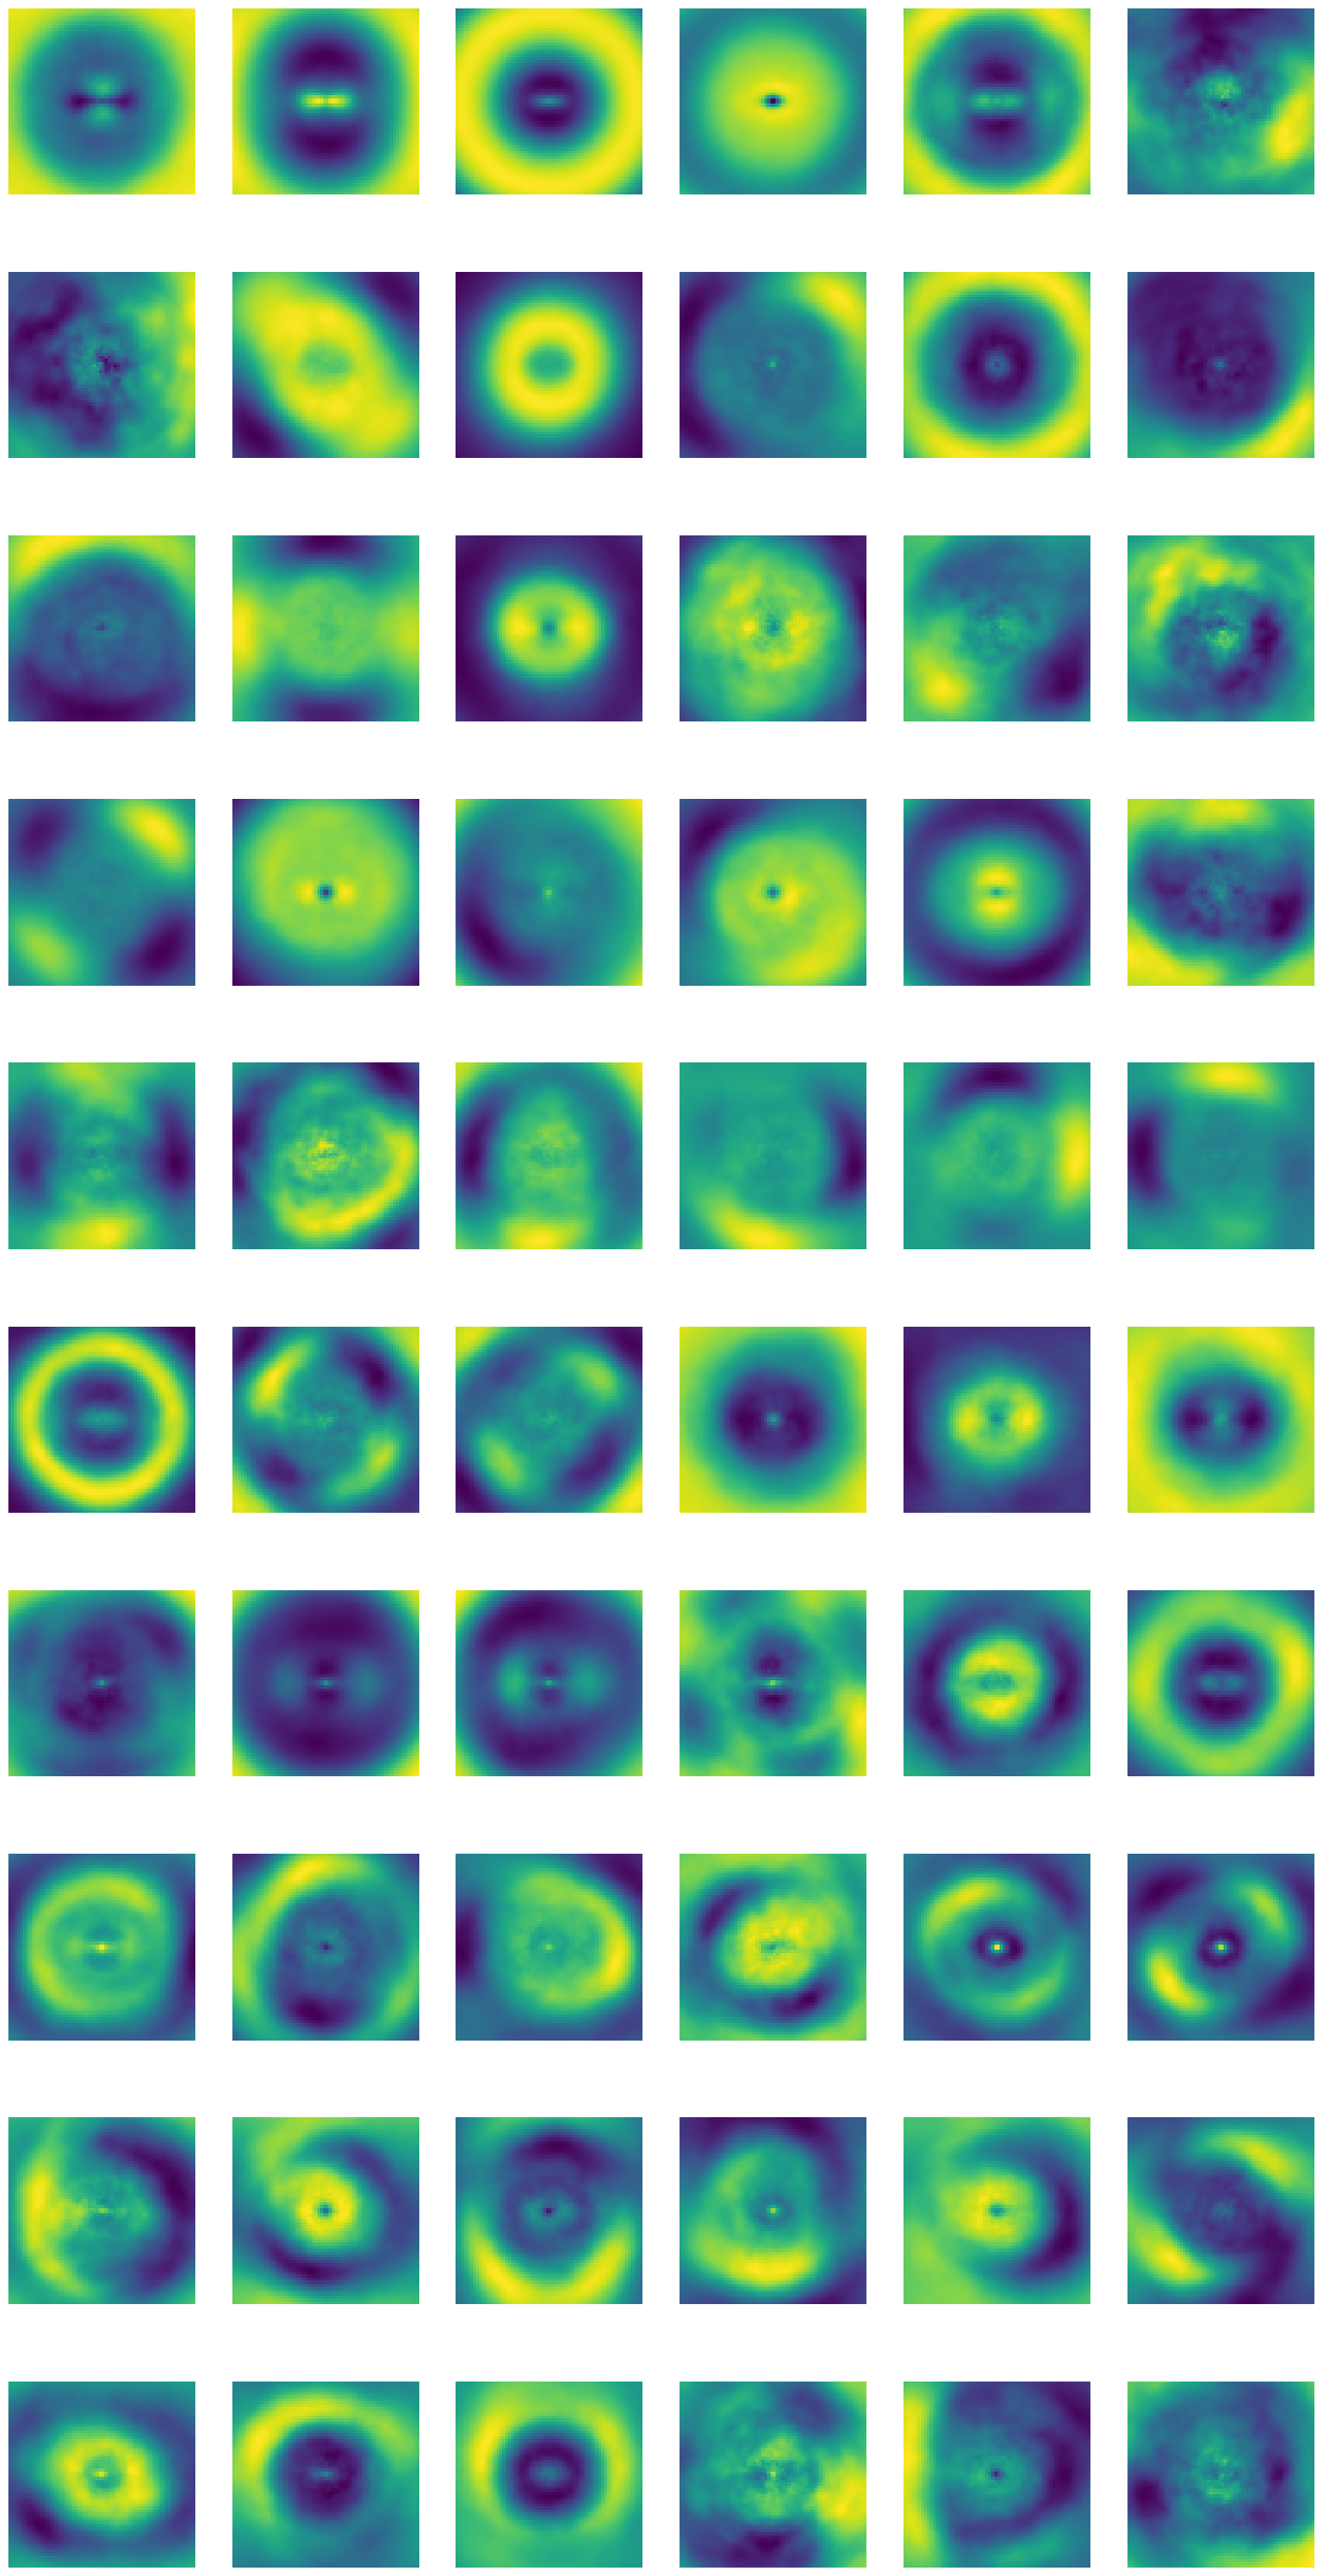

In [90]:
# Create porjection of the eigengalaxies in the x-y plane and plot them

fig,axis = plt.subplots(10,6,figsize = (20,40))
for i in range(60):
    image = project(eigen3d[i][2])
    axis[i//6,i%6].imshow(image)
    axis[i//6,i%6].axis("off")
plt.show()
    


In [91]:
import h5py

In [93]:
with h5py.File("../../RAW DATA/galaxy_data_with_dim3.hdf5", "r") as f:
    f.keys()

OSError: Unable to open file (truncated file: eof = 12763004928, sblock->base_addr = 0, stored_eof = 39930112584)

In [64]:
mayaviVolume(volume)

In [45]:
mayaviIsoSurface(volume, isovalue=2)

Exception occurred in traits notification handler for object: <mayavi.tools.modules.IsoSurfaceFactory object at 0x000001ED159C7EF0>, trait: contours, old value: 5, new value: [2]
Traceback (most recent call last):
  File "c:\Users\Ufuk\anaconda3\lib\site-packages\traits\trait_notifiers.py", line 342, in __call__
    self.handler(*args)
  File "c:\Users\Ufuk\anaconda3\lib\site-packages\mayavi\tools\modules.py", line 185, in _contours_changed
    self._target.contour.contours = self.contours
  File "c:\Users\Ufuk\anaconda3\lib\site-packages\traits\trait_types.py", line 2695, in validate
    return TraitListObject(self, object, name, value)
  File "c:\Users\Ufuk\anaconda3\lib\site-packages\traits\trait_list_object.py", line 584, in __init__
    super().__init__(
  File "c:\Users\Ufuk\anaconda3\lib\site-packages\traits\trait_list_object.py", line 213, in __init__
    super().__init__(self.item_validator(item) for item in iterable)
  File "c:\Users\Ufuk\anaconda3\lib\site-packages\traits\tr

TraitError: Each element of the 'contours' trait of a Contour instance must be -0.0005689836993860259 <= a number <= 0.0006789186024444199, but a value of 2 <class 'int'> was specified.

In [ ]:
mlab.figure(bgcolor=(0, 0, 0), size=(800, 600))
volume = mlab.pipeline.volume(mlab.pipeline.scalar_field(x), vmin=-1, vmax=1)
volume.volume_mapper.scalar_range = [-1, 1]
volume._volume_property.scalar_opacity_unit_distance = 0.5
mlab.show()